# Udacity Capstone Project
## Machine Learning Engineer Nanodegree
##### Samuel Strohkorb
##### October 24, 2018
***

## Introduction
This jupyter notebook is the "top level" of the three jupyter notebooks used for this project. All the code below is used to great graphics and data needed for the project. The "Results-Collection.ipynb" is the notebook used to collect all of the data for both of the models. In this notebook, only result is calculated per model.

In [1]:
import ipynb.fs.defs.Model as model
import matplotlib.pyplot as plt
import visuals as v #Plotting data is kept here for neatness
%matplotlib inline

In [2]:
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 100
#mpl.rcParams.update({'font.size': 12})

In [3]:
from nice_plots import init_nice_plots #Plots plots nicely
init_nice_plots(mpl)

Loading data


100%|███████████████████████████████████████████████████| 118/118 [00:06<00:00, 17.38it/s]


<Figure size 576x396 with 0 Axes>

c:\programdata\anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


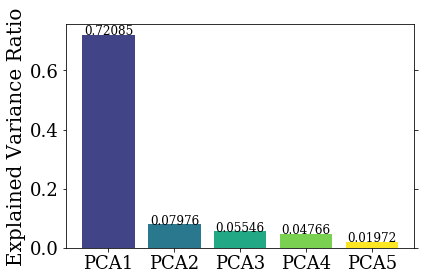

In [4]:
from sklearn.decomposition import PCA

X, y = model.get_match_data(week=6, with_rs=True)

cmap='viridis'

pca = PCA(n_components=5, random_state=42)
pca.fit(X)
variance_ratios = pca.explained_variance_ratio_
plt.figure(1, figsize=(8,5.5))
fig, ax = plt.subplots()
mpl_colors = [mpl.cm.get_cmap(cmap)((i+1)/5) for i in range(5)]
plt.bar([i for i in range(len(variance_ratios))], variance_ratios, color=mpl_colors)
plt.xticks([i for i in range(len(variance_ratios))], ['PCA'+str(i+1) for i in range(len(variance_ratios))])
plt.ylabel('Explained Variance Ratio')
#plt.title('Explained Variance Ratio per PCA Dimension')
for i, j in enumerate(variance_ratios):
    ax.text(i-0.37, j, '{:.5f}'.format(j), fontsize=12)
plt.savefig('supporting_images/FirstPCA.png', dpi=300)
plt.show()

c:\programdata\anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


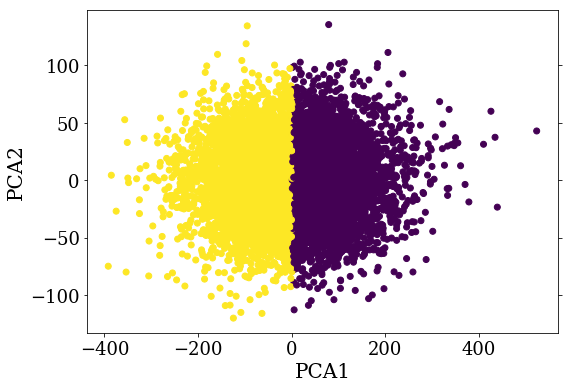

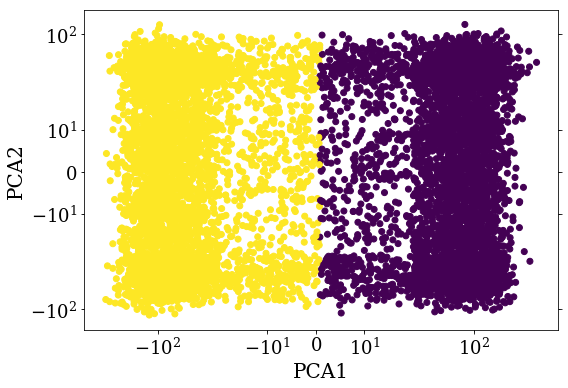

In [5]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
X_transform = pca.transform(X)
clusterer = GaussianMixture(n_components=2, random_state=42).fit(X_transform[:,:1])
preds = clusterer.predict(X_transform[:,:1])
plt.figure(1, figsize=(8,5.5))
plt.scatter(X_transform[:,0], X_transform[:,1], c=preds)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
#plt.title('PCA2 v. PCA1')
plt.savefig('supporting_images/FirstCluster.png', dpi=300)
plt.figure(2, figsize=(8,5.5))
plt.scatter(X_transform[:,0], X_transform[:,1], c=preds)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.xscale('symlog', linthreshx=20)
plt.yscale('symlog', linthreshy=20)
#plt.title('PCA2 v. PCA1 With Symmetric Logarithmic Scale')
plt.savefig('supporting_images/SecondCluster.png', dpi=300)
plt.show()

In [6]:
score = silhouette_score(X_transform[:,:1], preds)
score

0.5470914725952126

Training set has 7815 samples and 5 features.
Testing set has 1380 samples and 5 features.


c:\programdata\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\programdata\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<Figure size 432x288 with 0 Axes>

c:\programdata\anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


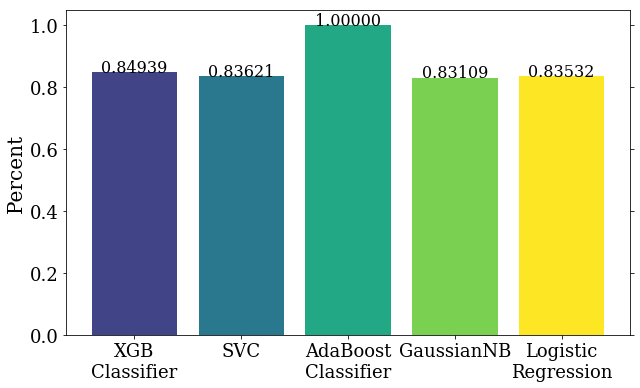

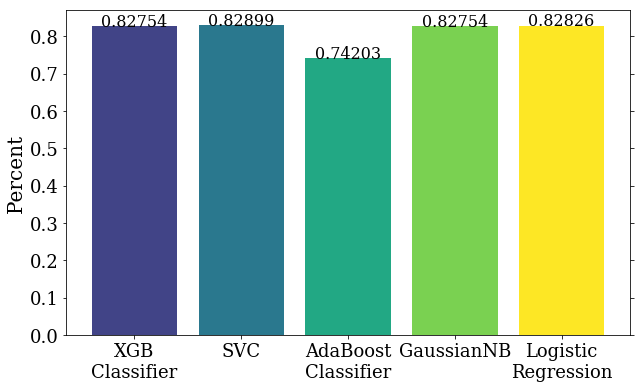

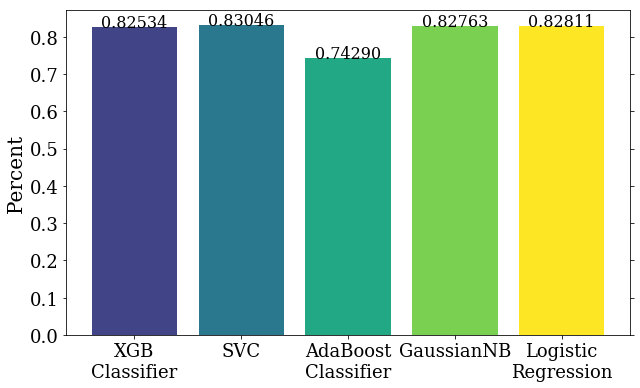

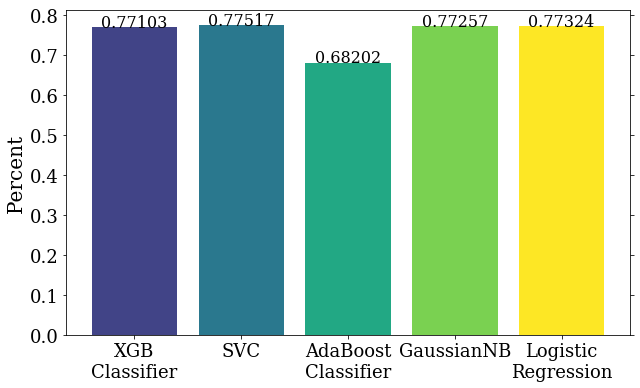

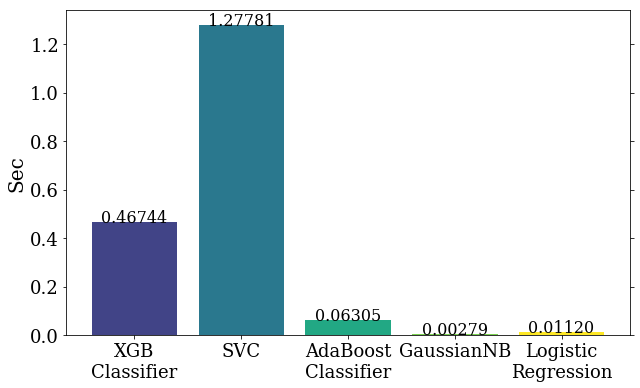

In [7]:
data = model.model_selection(X_transform, y)
v.model_selection_scores(data, mpl, plt, True, 9, 5.5, .3125, 16)

c:\programdata\anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


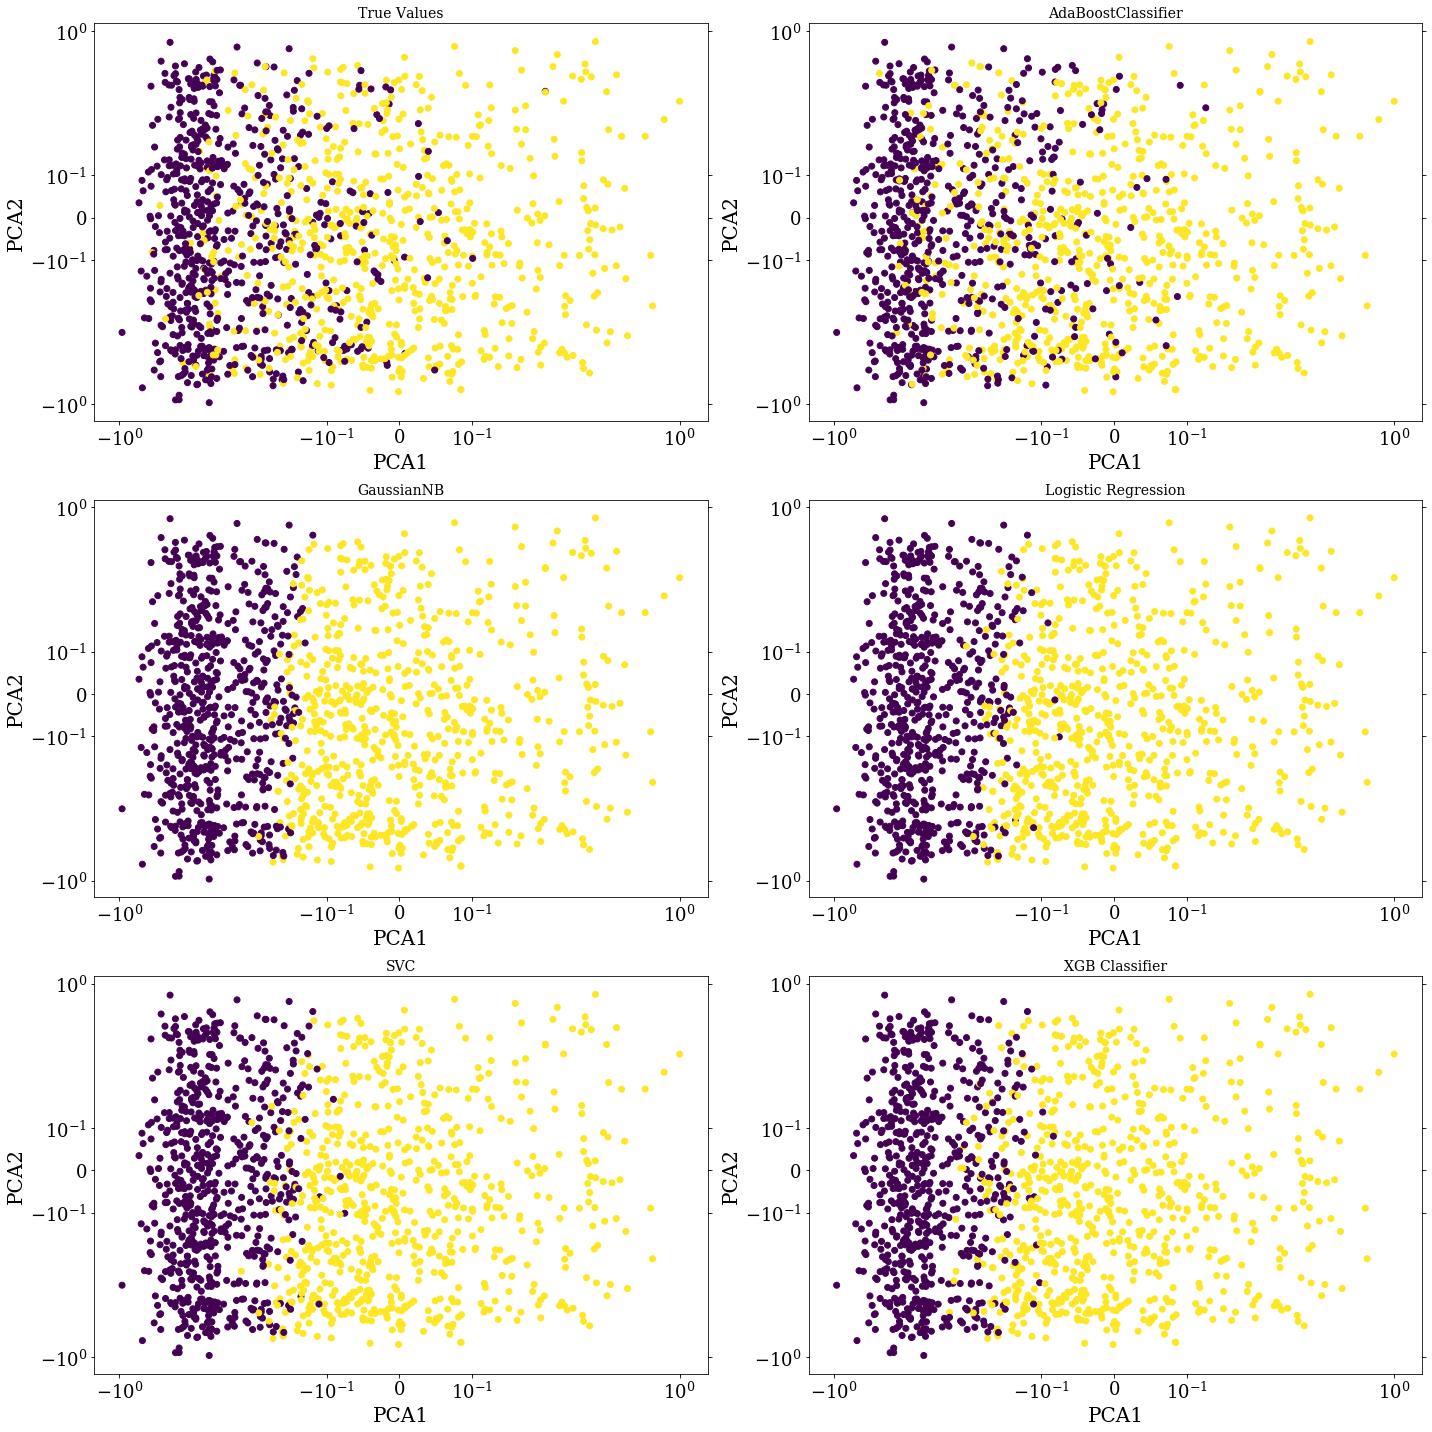

In [8]:
v.model_selection_pca_plots(data, mpl, plt)

Loading match data to train on


100%|█████████████████████████████████████████████████████| 18/18 [00:00<00:00, 23.97it/s]


Training set has 1396 samples and 5 features.

Loading future data to predict on


100%|█████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.78it/s]


0.8322351748606184
0.8467168123602359
0.7926946785553174

0.6756208819057273
0.6643732530638572
0.6029434003259192


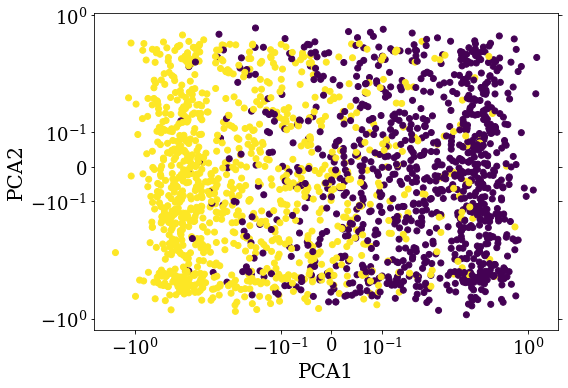

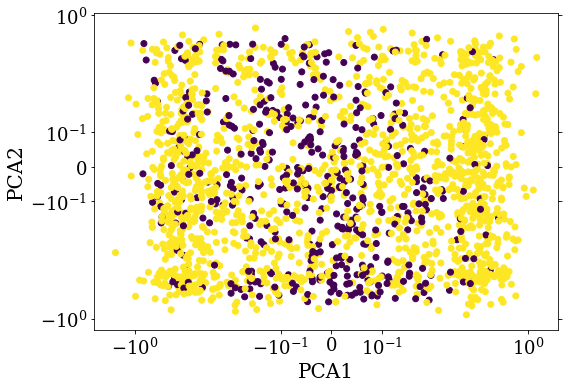

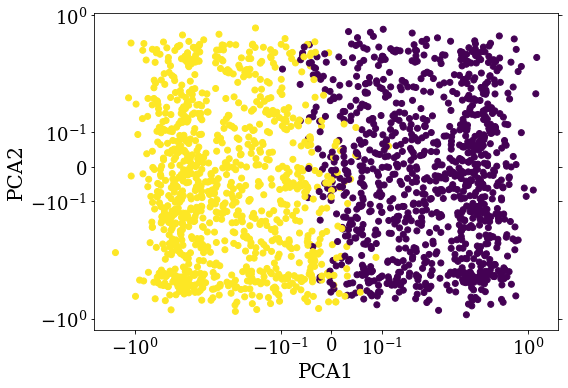

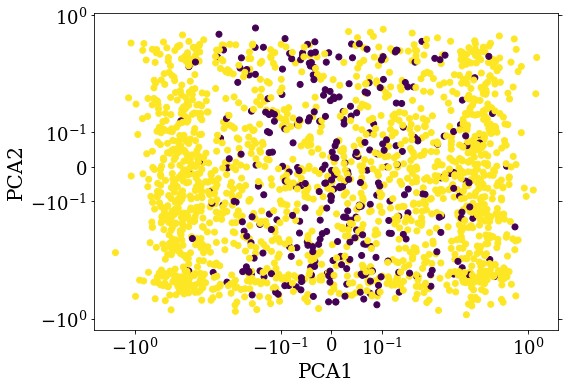

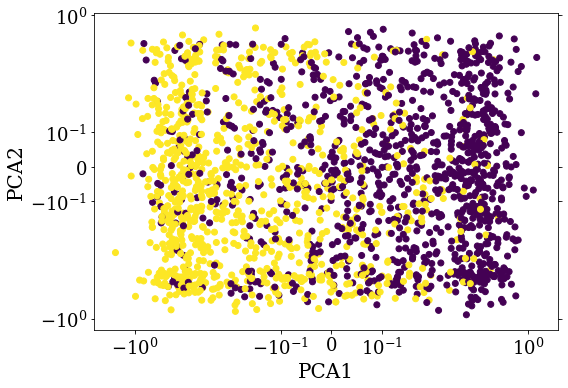

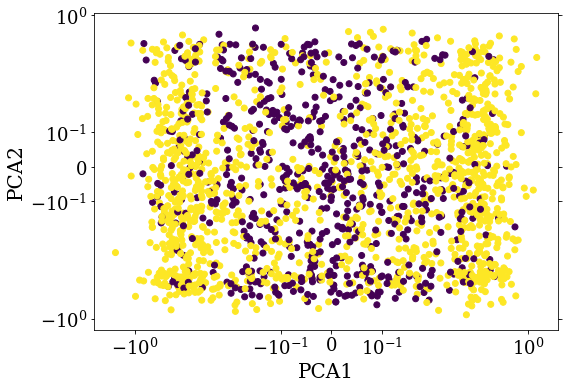

In [9]:
with_rs = True
week = 2
data = model.future_matches_GNB(week, with_rs, num_pca=5)
data[8].to_csv('results/GaussianNB_Results_Week_'+str(week)+"_With_RS_"+str("True" if with_rs else "False")+".csv")
v.GNB_predictions(data, mpl, plt, week, with_rs)

Training set has 7815 samples and 440 features.
Testing set has 1380 samples and 440 features.


<Figure size 432x288 with 0 Axes>

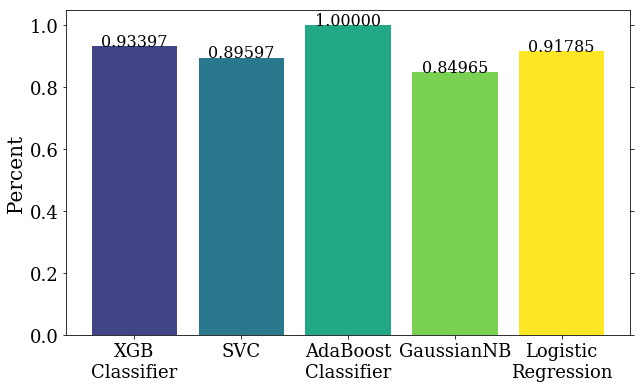

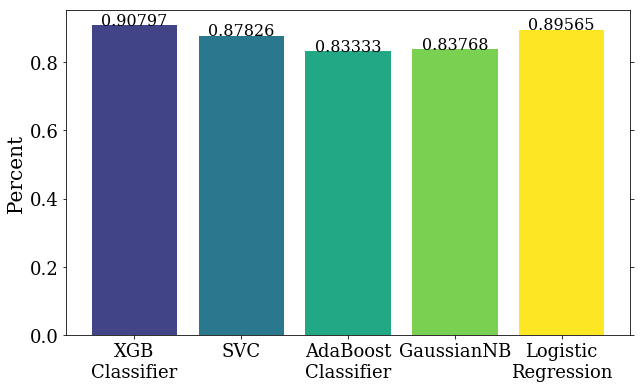

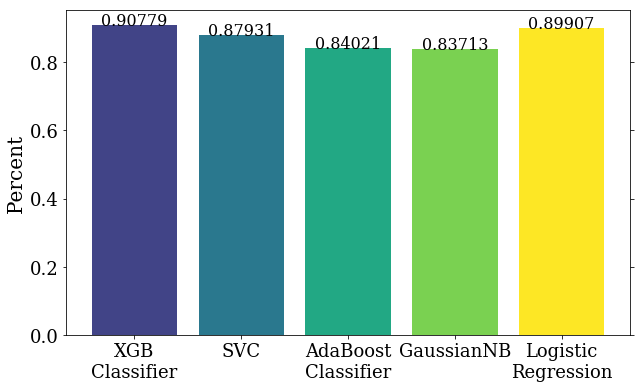

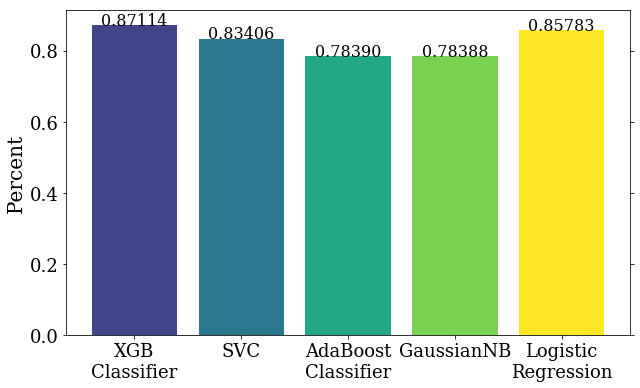

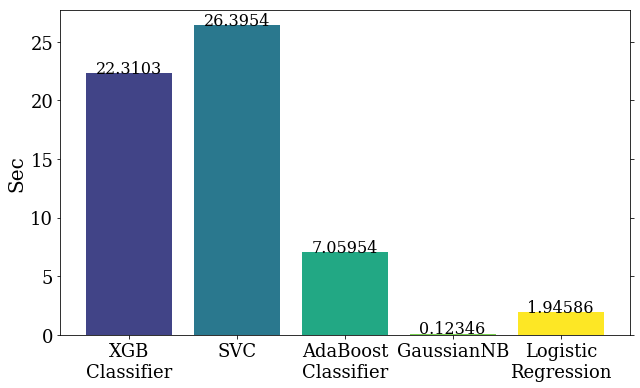

In [10]:
data = model.model_selection(X, y)
v.model_selection_scores(data, mpl, plt, False, 9, 5.5, .3125, 16)

In [11]:
with_rs = True
if with_rs:
    columns = X.columns.values
else:
    X_tmp = X.drop(['Ranking_Score_a', 'tba_rpEarned_CCWM', 'tba_rpEarned_OAVE', 'tba_rpEarned_CPR', 'tba_rpEarned_OPR', 'tba_rpEarned_DAVE', 'tba_rpEarned_DPR'], axis=1)
    columns = X_tmp.columns.values

Loading match data to train on


100%|█████████████████████████████████████████████████████| 18/18 [00:00<00:00, 19.29it/s]


Training set has 1396 samples and 440 features.

Loading future data to predict on


100%|█████████████████████████████████████████████████████| 24/24 [00:08<00:00,  3.05it/s]


0.9011657374556513
0.9125628140703518
0.8740031316227623

0.6756208819057273
0.6643732530638572
0.6029434003259192


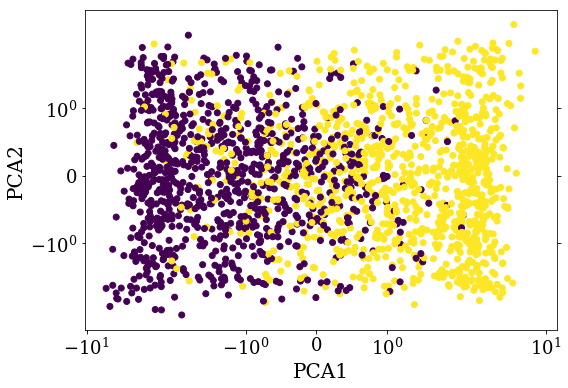

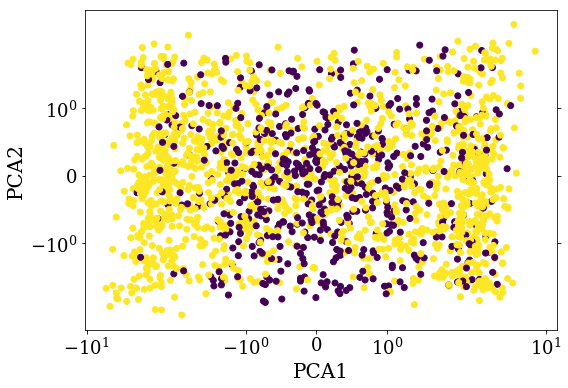

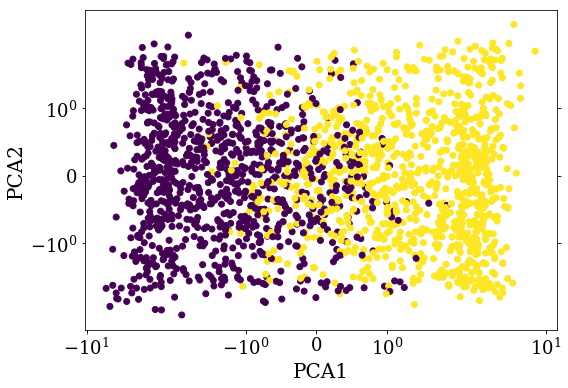

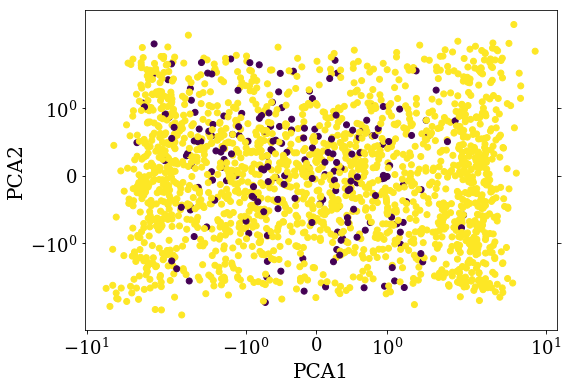

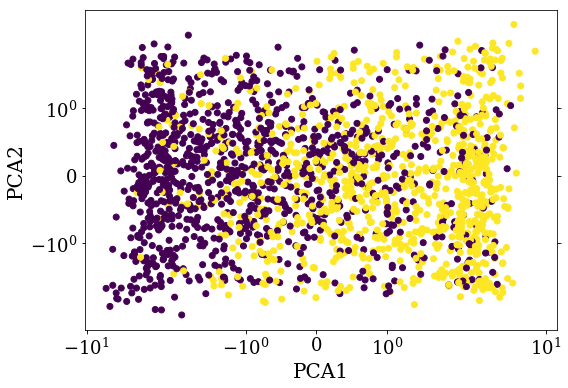

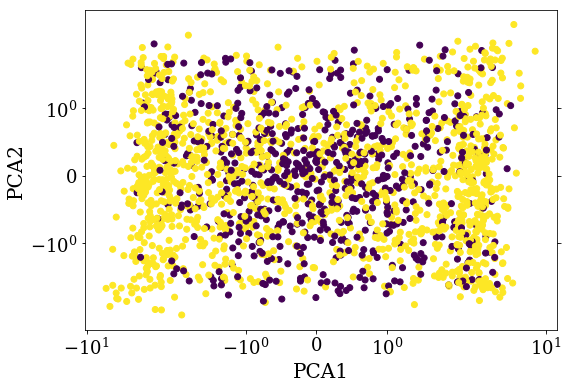

In [12]:
week = 2
data = model.future_matches_XGB(week, with_rs)
data[9].to_csv('results/XGB_Results_Week'+str(week)+"_With_RS_"+str("True" if with_rs else "False")+".csv")
v.XGB_predictions(data, mpl, plt, week, with_rs)
from pandas import DataFrame
features = DataFrame(data[8].feature_importances_.reshape(-1,1,).T, columns=columns).sort_values(by=[0], axis=1, ascending=False)
features.transpose().to_csv('results/XGB_Features_Week_'+str(week)+"_With_RS_"+str("True" if with_rs else "False")+".csv")